In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
pd.__version__

'1.0.2'

In [3]:
np.__version__

'1.18.2'

In [4]:
matplotlib.__version__

'3.2.0'

In [5]:
df = pd.read_csv('data/titanicfull.csv')

In [6]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S


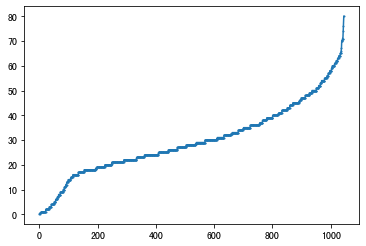

In [7]:
fig, ax = plt.subplots()
_ = ax.plot(np.sort(df['age']), marker = 'o', markersize = 1)

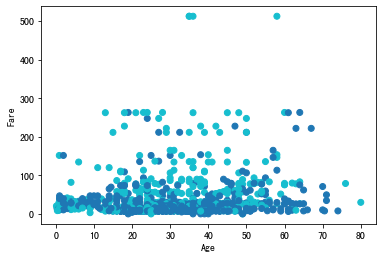

In [11]:
fig, ax = plt.subplots()
_ = ax.scatter('age', 'fare', c='survived', cmap='tab10', data=df)  #确定颜色通过Tab10方式
_ = ax.set(xlabel = 'Age', ylabel = "Fare")

In [14]:
import matplotlib.colors as mcolors
cmap = mcolors.ListedColormap(['black', 'yellowgreen'])

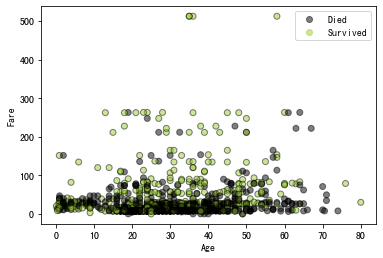

In [22]:
fig, ax = plt.subplots()
sc = ax.scatter('age', 'fare', 
                c='survived', 
                cmap=cmap, 
                alpha = .5, edgecolor='black',
                data=df)  #确定自定义颜色
_ = ax.set(xlabel = 'Age', ylabel = "Fare")
_ = ax.legend(handles = sc.legend_elements()[0], labels=['Died','Survived'])

<__array_function__ internals>:5: UserWarning: Warning: converting a masked element to nan.
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/numpy/core/_asarray.py:85: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/matplotlib/ticker.py:590: UserWarning: Warning: converting a masked element to nan.
  s = self.format % xp


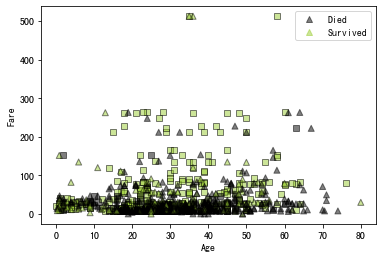

In [27]:
fig, ax = plt.subplots()
sc = ax.scatter('age', 'fare', c='survived', cmap=cmap,
               alpha=.5, edgecolor='black',
               marker='s', label='Female',
               data=df[df['sex'].str.match('female')])
sc = ax.scatter('age', 'fare', c='survived', cmap=cmap,
               alpha=.5, edgecolor='black',
               marker='^', label='Male',
               data=df[df['sex'].str.match('male')])

_ = ax.set(xlabel = 'Age', ylabel='Fare')
_ = ax.legend(handles = sc.legend_elements()[0], labels = ['Died', 'Survived'])

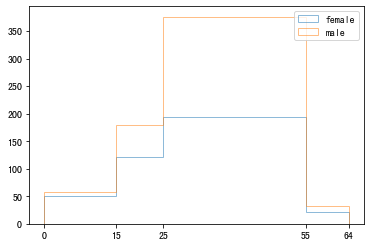

In [29]:
fig, ax = plt.subplots()
for label, gdf in df.groupby('sex'):
    ax.hist('age', bins=[0, 15, 25, 55, 64], data=gdf,
           label=label, alpha=.5, histtype='step')
_ = ax.set_xticks([0, 15, 25, 55, 64])
_ = ax.legend()